In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df1=pd.read_csv('Customers.csv')
df2=pd.read_csv('Products.csv')
df3=pd.read_csv('Transactions.csv')

In [4]:
df1.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
df2.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
df3.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [7]:
df1.shape

(200, 4)

In [8]:
df2.shape

(100, 4)

In [9]:
df3.shape

(1000, 7)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [13]:
df1.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [30]:
df2.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [15]:
df3.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [16]:
df1.isna().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [17]:
df2.isna().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


In [18]:
df3.isna().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [19]:
df1.nunique()

,0
CustomerID,200
CustomerName,200
Region,4
SignupDate,179


In [21]:
df2.nunique()

,0
ProductID,100
ProductName,66
Category,4
Price,100


In [22]:
df3.nunique()

,0
TransactionID,1000
CustomerID,199
ProductID,100
TransactionDate,1000
Quantity,4
TotalValue,369
Price,100


In [27]:
print(df1.duplicated().sum())
print(df2.duplicated().sum())
print(df3.duplicated().sum())


0
0
0


In [24]:

# Find customer IDs present in df1 but not in df3
absent_in_df3 = set(df1['CustomerID']) - set(df3['CustomerID'])
print("Customer IDs absent in df3:", absent_in_df3)


Customer IDs absent in df3: {'C0180'}


In [26]:

# Display the row(s) where 'CustomerID' is 'C0180'
customer_c0180 = df1[df1['CustomerID'] == 'C0180']
customer_c0180

,CustomerID,CustomerName,Region,SignupDate
179,C0180,Amy Carpenter,Asia,2023-10-25


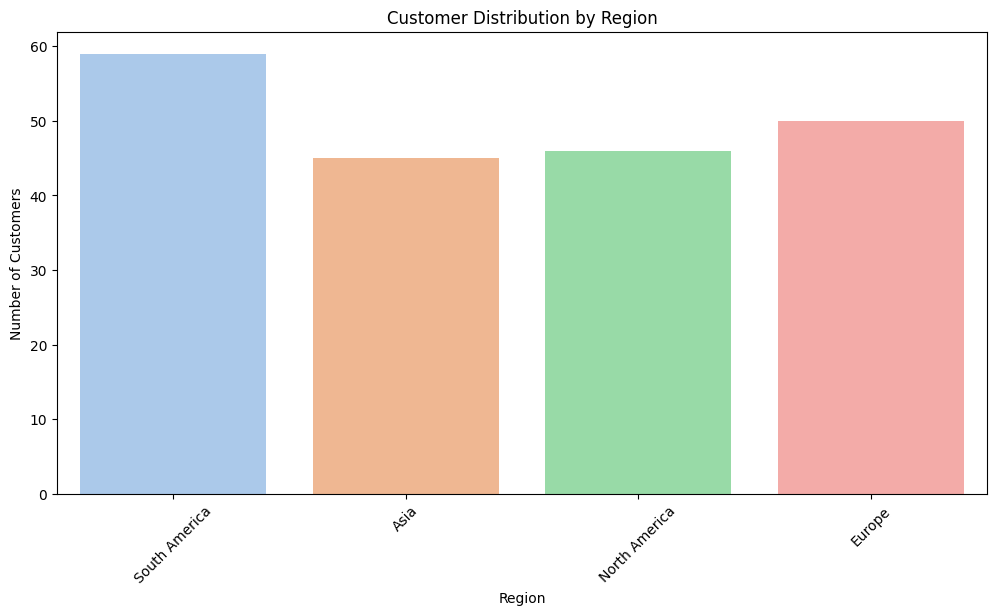

In [29]:

plt.figure(figsize=(12, 6))
sns.countplot(x='Region', data=df1, hue='Region', palette='pastel')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

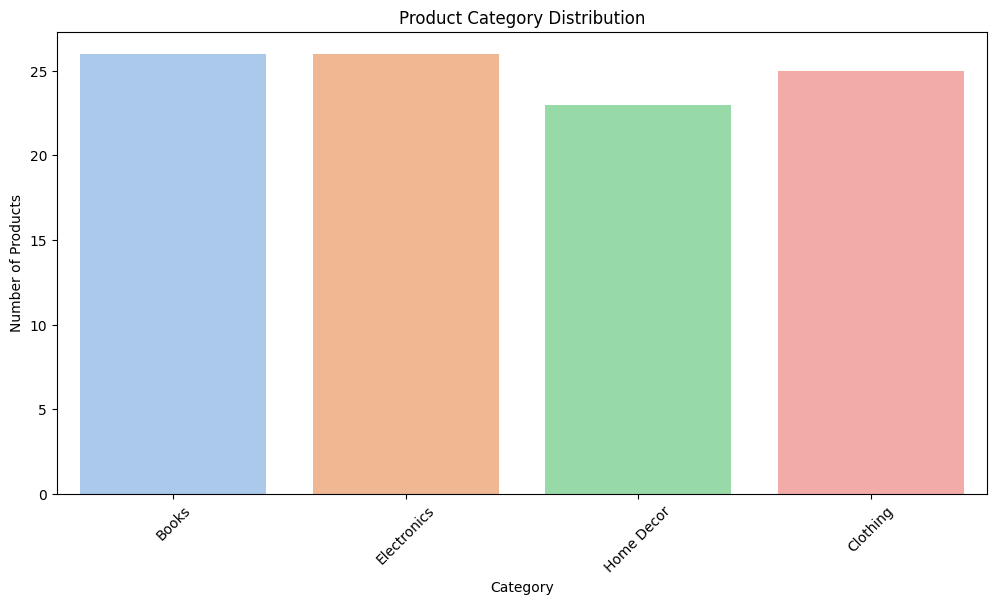

In [34]:

plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=df2, hue='Category', palette='pastel')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

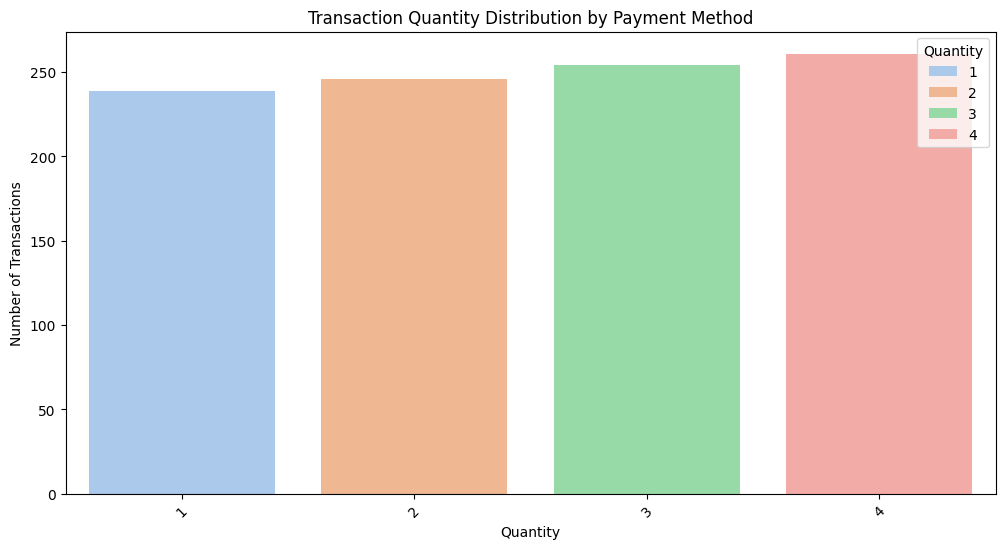

In [37]:

plt.figure(figsize=(12, 6))
sns.countplot(x='Quantity', data=df3, hue='Quantity', palette='pastel')
plt.title('Transaction Quantity Distribution by Payment Method')
plt.xlabel('Quantity')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

In [38]:
df1['SignupDate'] = pd.to_datetime(df1['SignupDate'])
df3['TransactionDate'] = pd.to_datetime(df3['TransactionDate'])

In [39]:
region_sales = df3.merge(df1, on='CustomerID').groupby('Region')['TotalValue'].sum()
print("\nRegion-wise Sales:")
print(region_sales)


Region-wise Sales:
Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


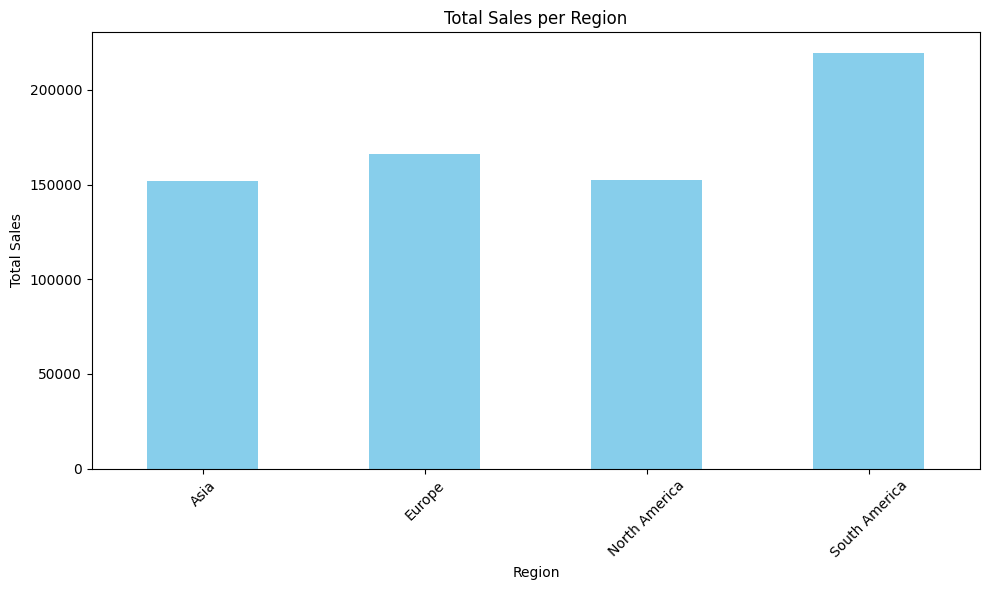

In [45]:

plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales per Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
category_avg_price = df2.groupby('Category')['Price'].mean()
print("\nCategory-wise Average Price:")
print(category_avg_price)


Category-wise Average Price:
Category
Books          292.212308
Clothing       263.720000
Electronics    275.353462
Home Decor     235.020000
Name: Price, dtype: float64


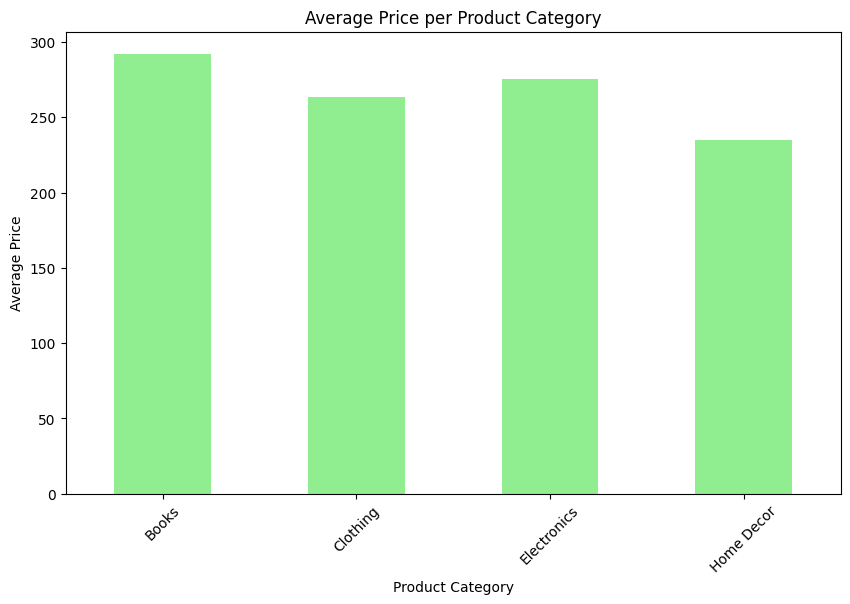

In [49]:

plt.figure(figsize=(10, 6))
category_avg_price.plot(kind='bar', color='lightgreen')
plt.title('Average Price per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

In [42]:
signup_trends = df1['SignupDate'].dt.to_period('M').value_counts().sort_index()
print("\nSignup Trends (Monthly):")
print(signup_trends)


Signup Trends (Monthly):
SignupDate
2022-01     1
2022-02     7
2022-03     8
2022-04     8
2022-05     8
2022-06     5
2022-07     4
2022-08     4
2022-09     6
2022-10     3
2022-11     3
2022-12     7
2023-01     5
2023-02     6
2023-03     8
2023-04     6
2023-05     3
2023-06     3
2023-07     3
2023-08     2
2023-09     4
2023-10     7
2023-11     5
2023-12     5
2024-01     9
2024-02     8
2024-03     4
2024-04    10
2024-05     6
2024-06     4
2024-07     6
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, Name: count, dtype: int64


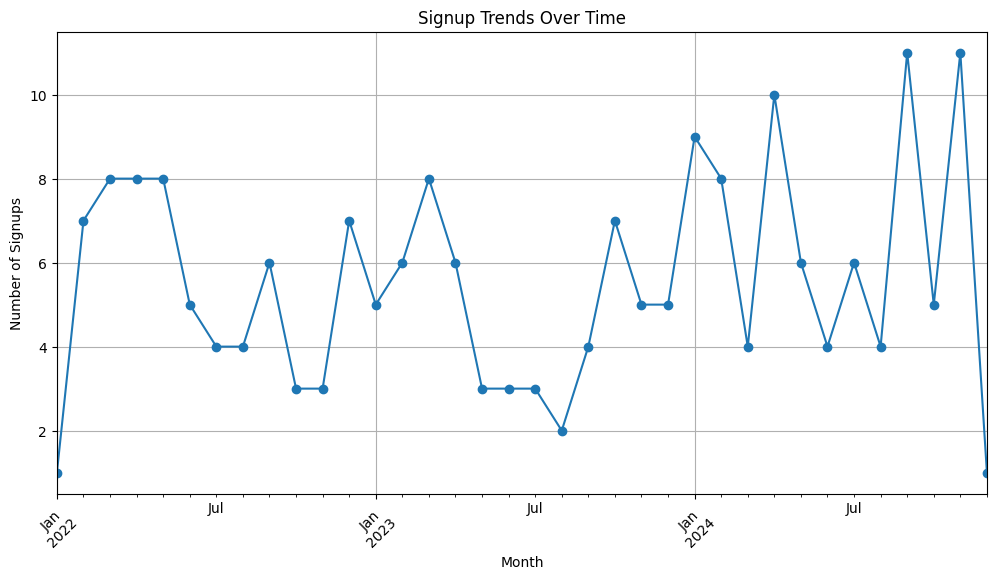

In [43]:

plt.figure(figsize=(12, 6))
signup_trends.plot(kind='line', marker='o')
plt.title('Signup Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [44]:
transaction_trends = df3['TransactionDate'].dt.to_period('M').value_counts().sort_index()
print("\nTransaction Trends (Monthly):")
print(transaction_trends)


Transaction Trends (Monthly):
TransactionDate
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: count, dtype: int64


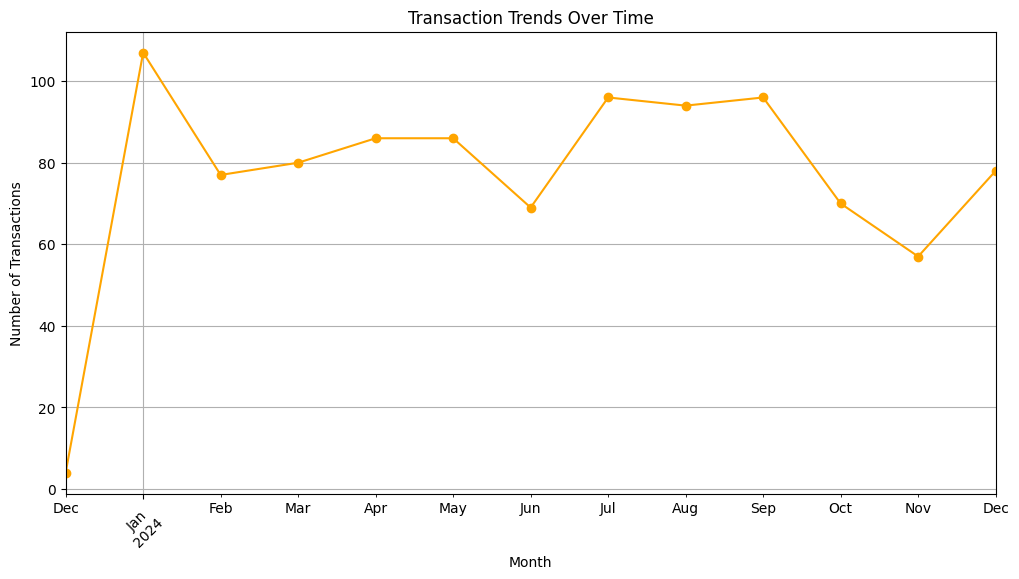

In [50]:

plt.figure(figsize=(12, 6))
transaction_trends.plot(kind='line', marker='o', color='orange')
plt.title('Transaction Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [61]:
from tabulate import tabulate

top_customers = df3.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10).reset_index()
top_customers_with_details = top_customers.merge(df1, on='CustomerID', how='left')
top_customer_transactions = df3[df3['CustomerID'].isin(top_customers['CustomerID'])]
top_customer_products = top_customer_transactions.merge(df2, on='ProductID', how='left')

grouped_categories = top_customer_products.groupby('CustomerID')['Category'].apply(list).reset_index(name='Categories')

final_table = top_customers_with_details.merge(grouped_categories, on='CustomerID', how='left')

print("Top 10 High-Spending Customers with Regions and Product Categories:")
print(tabulate(final_table[['CustomerID', 'CustomerName', 'Region', 'TotalValue', 'Categories']], headers='keys', tablefmt='pretty'))

Top 10 High-Spending Customers with Regions and Product Categories:
+---+------------+----------------------+---------------+--------------------+-----------------------------------------------------------------------------------------------------------------------------------+
|   | CustomerID |     CustomerName     |    Region     |     TotalValue     |                                                            Categories                                                             |
+---+------------+----------------------+---------------+--------------------+-----------------------------------------------------------------------------------------------------------------------------------+
| 0 |   C0141    |     Paul Parsons     |    Europe     | 10673.869999999999 |   ['Books', 'Clothing', 'Clothing', 'Home Decor', 'Electronics', 'Books', 'Clothing', 'Home Decor', 'Clothing', 'Electronics']    |
| 1 |   C0054    |     Bruce Rhodes     |     Asia      | 8040.389999999999  |          

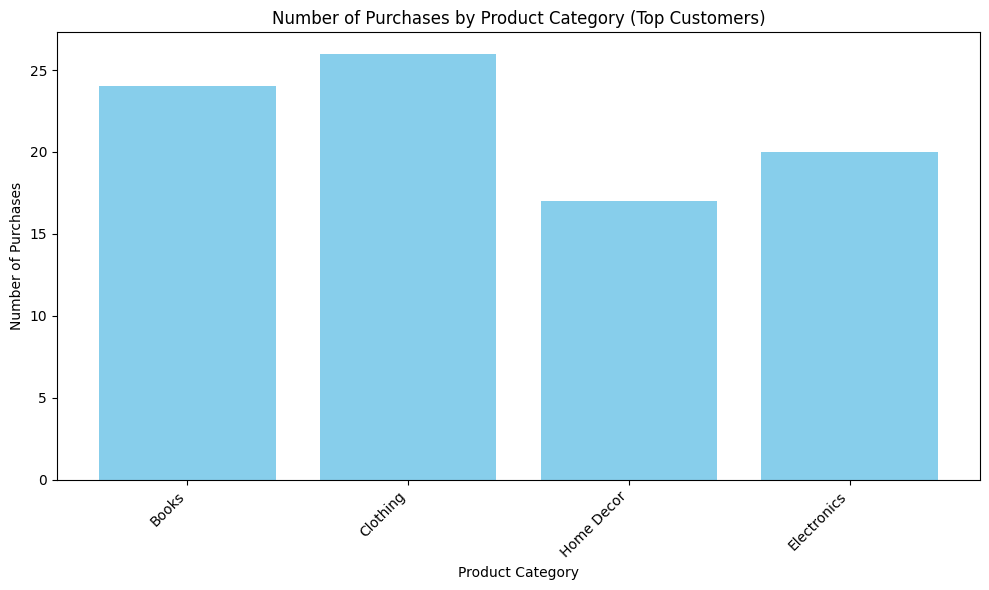

In [63]:
from collections import Counter

all_categories = [category for sublist in final_table['Categories'] for category in sublist]
category_counts = Counter(all_categories)

categories = list(category_counts.keys())
counts = list(category_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color='skyblue')
plt.xlabel("Product Category")
plt.ylabel("Number of Purchases")
plt.title("Number of Purchases by Product Category (Top Customers)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [54]:
popular_products = df3.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Popular Products by Quantity Sold:")
print(popular_products)

Top 10 Popular Products by Quantity Sold:
ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64


In [55]:
average_order_value = df3['TotalValue'].mean()
print("Average Order Value (AOV): ₹", round(average_order_value, 2))

Average Order Value (AOV): ₹ 690.0


Revenue Distribution by Product Category:
Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64


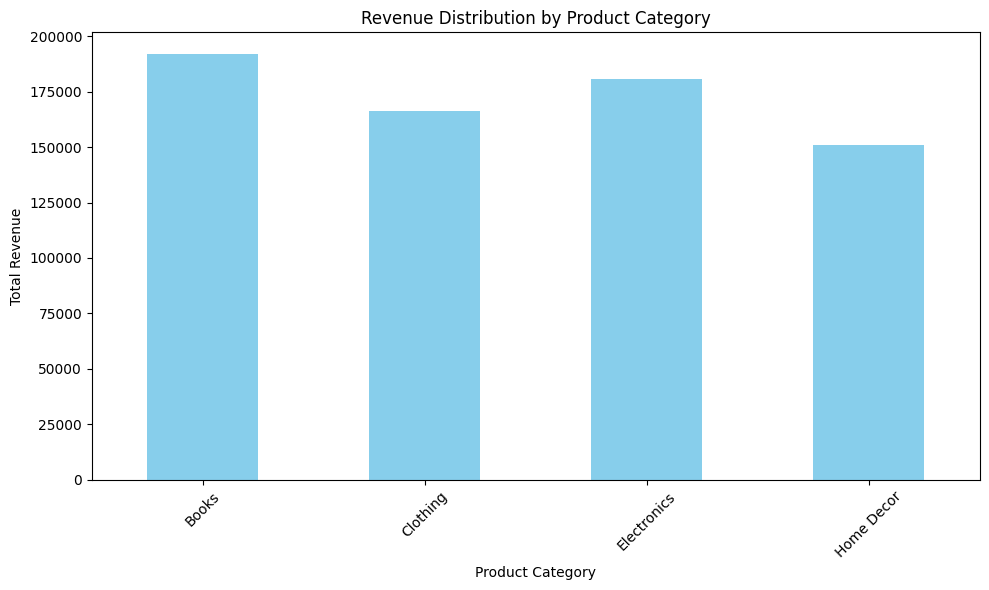

In [57]:

revenue_by_category = df3.merge(df2, on='ProductID').groupby('Category')['TotalValue'].sum()
print("Revenue Distribution by Product Category:")
print(revenue_by_category)

plt.figure(figsize=(10, 6))
revenue_by_category.plot(kind='bar', color='skyblue')
plt.title('Revenue Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [68]:


first_transaction_dates = df3.groupby('CustomerID')['TransactionDate'].min().reset_index()
first_transaction_dates.rename(columns={'TransactionDate': 'FirstTransactionDate'}, inplace=True)

customer_signup_transaction = first_transaction_dates.merge(df1, on='CustomerID', how='left')

customer_signup_transaction['SignupDate'] = pd.to_datetime(customer_signup_transaction['SignupDate'])
customer_signup_transaction['FirstTransactionDate'] = pd.to_datetime(customer_signup_transaction['FirstTransactionDate'])

customer_signup_transaction['DaysBetweenSignupAndFirstTransaction'] = (
    customer_signup_transaction['FirstTransactionDate'] - customer_signup_transaction['SignupDate']
).dt.days

print(tabulate(customer_signup_transaction[['CustomerID', 'SignupDate', 'FirstTransactionDate', 'DaysBetweenSignupAndFirstTransaction']], headers='keys', tablefmt='pretty'))

+-----+------------+---------------------+----------------------+--------------------------------------+
|     | CustomerID |     SignupDate      | FirstTransactionDate | DaysBetweenSignupAndFirstTransaction |
+-----+------------+---------------------+----------------------+--------------------------------------+
|  0  |   C0001    | 2022-07-10 00:00:00 | 2024-01-19 03:12:55  |                 558                  |
|  1  |   C0002    | 2022-02-13 00:00:00 | 2024-02-28 07:44:21  |                 745                  |
|  2  |   C0003    | 2024-03-07 00:00:00 | 2024-02-18 02:50:37  |                 -18                  |
|  3  |   C0004    | 2022-10-09 00:00:00 | 2024-02-28 10:16:35  |                 507                  |
|  4  |   C0005    | 2022-08-15 00:00:00 | 2024-03-15 04:08:59  |                 578                  |
|  5  |   C0006    | 2024-01-07 00:00:00 | 2024-01-25 09:29:44  |                  18                  |
|  6  |   C0007    | 2022-06-18 00:00:00 | 2024-02-20 0